In [10]:
from parsers_interaction import *
from rdkit import Chem
import torch
import matplotlib.pyplot as plt

In [11]:
path_ligand = "../../dataset2016/10gs/10gs_ligand.mol2"
path_protein = "../../dataset2016/10gs/10gs_pocket.pdb"

In [12]:
import os
def read_dataset(directory, ligand_file_extention, protein_file_extention):
    '''
    from directory returns a list of pdb_id, path to protein, path to ligand
    The directory contains compound folders (each has an ID with 4 letters,
    ex. abcd) with 4 files:
    - abcd_protein.pdb
    - abcd_pocket.pdb
    - abcd_ligand.sdf
    - abcd_ligand.mol2
    '''
    assert ligand_file_extention in ('sdf', 'mol2')
    assert protein_file_extention in ('protein', 'pocket', 'processed')
    molecules_files = []
    for folder_name in os.listdir(directory):
        if len(folder_name) == 4:
            folder_dir = os.path.join(directory, folder_name)
            files = os.listdir(folder_dir)
            compound_id = folder_name

            for file in files:
                if file.endswith(protein_file_extention + '.pdb'):
                    file_protein = file
                elif file.endswith('ligand.' + ligand_file_extention):
                    file_ligand = file
            # only add molecule if affinity is not uncertain
            molecules_files += [
                (compound_id, os.path.join(folder_dir, file_protein),
                    os.path.join(folder_dir,
                                file_ligand))
            ]
    return molecules_files

In [13]:
pdb_files = read_dataset("../../dataset2016", "mol2", "pocket")

KeyboardInterrupt: 

In [ ]:
len(pdb_files)

13282

In [ ]:
atoms_ligand = {}
atoms_protein = {}
for pdb_id, path_protein, path_ligand in pdb_files:
    ligand = Chem.MolFromMol2File(path_ligand, sanitize=True, removeHs=True)
    protein = Chem.MolFromPDBFile(path_protein, flavor=True, sanitize=True, removeHs=True)
    if ligand is not None and protein is not None:
        for atom in ligand.GetAtoms():
            atom_symbol = atom.GetSymbol()
            if atom_symbol not in atoms_ligand:
                atoms_ligand[atom_symbol] = 1
            else:
                atoms_ligand[atom_symbol] += 1
        for atom in protein.GetAtoms():
            atom_symbol = atom.GetSymbol()
            if atom_symbol not in atoms_protein:
                atoms_protein[atom_symbol] = 1
            else:
                atoms_protein[atom_symbol] += 1

[22:24:08] sanitise [22:24:08] 4iu4_ligand: [22:24:26] Explicit valence for atom # 8 C, 5, is greater than permitted
[22:24:26] sanitise [22:24:26] 4iu4_ligand: [22:24:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:24:26] sanitise [22:24:26] 3fy0_ligand: [22:24:27] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:24:27] sanitise [22:24:27] 4ob1_ligand: [22:24:27] 6rsa_ligand: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[22:24:27] Unusual charge on atom 20 number of radical electrons set to zero
[22:24:27] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:24:27] sanitise [22:24:27] 4rlp_ligand: [22:24:27] Can't kekulize mol.  Unkekulized atoms: 33 34 35 37 38
[22:24:27] sanitise [22:24:27] 3v9b_ligand: [22:24:27] Unusual charge on atom 41 number of radical electrons set to zero
[22:24:27] Explicit valence for atom # 169 O, 3, is greater than permitted
[22:24:27] Explicit valence for atom # 

In [ ]:
print("atoms_ligand: ", atoms_ligand)
print("atoms_protein: ", atoms_protein)

atoms_ligand:  {'O': 74931, 'C': 284248, 'N': 56909, 'S': 4408, 'Cl': 1855, 'Br': 405, 'F': 3241, 'P': 2581, 'B': 132, 'I': 156, 'V': 2, 'Fe': 16, 'Ru': 10, 'Mg': 1, 'Se': 5, 'Pt': 2, 'H': 9, 'Hg': 1, 'Re': 1, 'Sb': 1, 'Cu': 1, 'Si': 4, 'As': 2, 'Be': 1, 'Rh': 1}
atoms_protein:  {'N': 858049, 'C': 3282702, 'O': 1134504, 'Zn': 1406, 'S': 30209, 'K': 16, 'Se': 132, 'Mg': 738, 'Ca': 336, 'Mn': 337, 'Fe': 80, 'Na': 107, 'Ni': 71, 'P': 76, 'Cu': 12, 'Co': 93, 'Cs': 1, 'Sr': 1, 'Cd': 29, 'Hg': 5, 'Ga': 1}


## Affinity Plots

In [ ]:
import torch

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")

In [ ]:
dataset[0]

Data(x=[792, 59], y=[2], pos=[792, 3], edge_index_1=[2, 1520], edge_index_2=[2, 7612], edge_attr_1=[1520, 13], edge_attr_2=[7612, 10])

In [ ]:
# dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat_core_set")

In [ ]:
list_of_affinities = []
for graph in dataset:
    # get affinity
    affinity = graph.y[0]
    list_of_affinities.append(float(affinity))

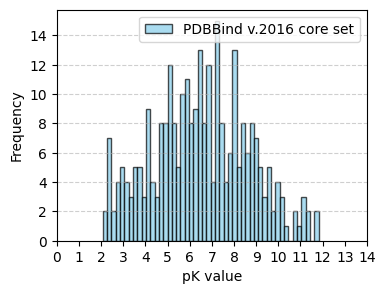

In [ ]:
plt.hist(list_of_affinities, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("pK value")
plt.ylabel("Frequency")
#plt.title("Histogram of -log(affinity) values")
# size
plt.rcParams["figure.figsize"] = (4, 3)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(range(0, 15), labels=[f'{i}' for i in range(0, 15)])

plt.legend(['PDBBind v.2016 core set'])

plt.savefig('affinity_histogram.pdf', dpi=300, bbox_inches='tight')

plt.show()


### Storing a pandas dataframe with the names of the complexes and which dataset they belong to

In [ ]:
import os
import pandas as pd

pdb_ids_core = os.listdir("../../CASF2016/")
data_core = {"pdb_id": pdb_ids_core, "dataset2016": ["core-set"] * len(pdb_ids_core)}
df1 = pd.DataFrame(data_core)
df1.set_index("pdb_id", inplace=True)

pdb_ids_refined = os.listdir("../../dataset2016_complete/refined-set/")
pdb_ids_refined = [pdb_id for pdb_id in pdb_ids_refined if pdb_id not in pdb_ids_core]
data_refined = {"pdb_id": pdb_ids_refined, "dataset2016": ["refined-set"] * len(pdb_ids_refined)}
df2 = pd.DataFrame(data_refined)
df2.set_index("pdb_id", inplace=True)


pdb_ids_general = os.listdir("../../dataset2016_complete/general-set-except-refined/")
data_general = {"pdb_id": pdb_ids_general, "dataset2016": ["general-set-except-refined"] * len(pdb_ids_general)}
df3 = pd.DataFrame(data_general)
df3.set_index("pdb_id", inplace=True)

# join dataframes
df = pd.concat([df1, df2, df3], axis=0)
# save dataframe
df.to_csv("../../pdb_ids_dataset2016.csv")

In [ ]:
df.value_counts()

dataset2016               
general-set-except-refined    9226
refined-set                   3772
core-set                       285
Name: count, dtype: int64

### Can we remove waters?

In [ ]:
from rdkit import Chem
import numpy as np
import torch
(ligand_coord, atoms_ligand, edges_ligand, edges_length_ligand,
             num_atoms_ligand) = molecule_info("../../dataset2016/1a9m/1a9m_ligand.mol2", "Ligand", 0, False)

atom_features:  42


In [ ]:
(protein_coord, atoms_protein, edges_protein,
                 edges_length_protein,
                 num_atoms_protein) = molecule_info("../../dataset2016/1a9m/1a9m_pocket.pdb", "Protein", 33, False)

439 is water
440 is water
441 is water
442 is water
443 is water
444 is water
445 is water
446 is water
447 is water
448 is water
449 is water
450 is water
atom_features:  439


### Create Refined Set 2016 from all complexes

In [ ]:
import pandas as pd
df = pd.read_csv("../../pdb_ids_dataset2016.csv")

In [ ]:
# make index be the pdb_id
df.set_index("pdb_id", inplace=True)

In [ ]:
df.value_counts()

dataset2016               
general-set-except-refined    9226
refined-set                   3772
core-set                       285
Name: count, dtype: int64

In [ ]:
# access row with pdb_id 4de3
df["dataset2016"].loc["4de3"]

'core-set'

In [ ]:
# list all pdb_ids in the core set or general-except-refined set
core_set = df[df["dataset2016"] == "core-set"].index.tolist()
general_except_refined_set = df[df["dataset2016"] == "general-set-except-refined"].index.tolist()

In [ ]:
import torch
dataset = torch.load("../../datasetsprocessed/0920_dataset2016")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [ ]:
dataset

GraphDataset(12830)

In [ ]:
dataset.remove_graph_by_ids(core_set)
dataset

GraphDataset(12545)

In [ ]:
dataset.remove_graph_by_ids(general_except_refined_set)

In [ ]:
dataset

GraphDataset(3745)

In [ ]:
# save dataset
torch.save(dataset, "../../datasetsprocessed/0929_dataset2016_refined")

### create different sets from 2020 all dataset

In [ ]:
import torch

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset = torch.load("../../datasetsprocessed/0915_pdbbind2020_joined_edges_all_dataset")

In [ ]:
import pandas as pd
df = pd.read_csv("../../LP_PDBBind.csv")

In [ ]:
# change name of Unnamed: 0 to pdb_id
df.rename(columns={"Unnamed: 0": "pdb_id"}, inplace=True)

In [ ]:
# set pdb_id as index
df.set_index("pdb_id", inplace=True)

In [ ]:
df.head()

,header,smiles,category,seq,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,value,covalent
pdb_id,,,,,,,,,,,,,,,
6r8o,isomerase,CSc1ccccc1[C@H]1CCCN1C(=O)CNC(=O)NCc1ccc2c(c1)...,refined,GNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFG...,1.36,2019-11-27,isomerase,test,True,True,True,False,Kd=0.006uM,8.22,False
3fh7,hydrolase/hydrolase inhibitor,O=C([O-])CCC[N@H+]1CCC[C@H]1COc1ccc(Oc2ccc(Cl)...,refined,VDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNL...,2.05,2010-01-05,hydrolase,test,True,True,True,False,Kd=25nM,7.60,False
4b7r,hydrolase,CCC(CC)O[C@@H]1C[C@H](C(=O)[O-])C[C@H]([NH3+])...,refined,VKLAGNSSLCPVSGWAIYSKDNSVRIGSKGDVFVIREPFISCSPLE...,1.90,2012-10-03,hydrolase,NaN,True,True,True,False,Ki=0.23nM,9.64,False
3qfd,immune system,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](C)NC(=O)[C@...,refined,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,1.68,2011-09-28,other,train,False,False,False,False,Kd=68uM,4.17,False
3fvn,membrane protein,[NH3+][C@@H](C[C@]1(C(=O)[O-])C[C@H]2OCC[C@@H]...,refined,ANRTLIVTTILEEPYVMYRKSDKPLYGNDRFEGYCLDLLKELSNIL...,1.50,2010-01-19,membrane,val,True,True,True,False,Ki=169nM,6.77,False


In [ ]:
df.category.value_counts()

category
general    14108
refined     5050
core         285
Name: count, dtype: int64

In [ ]:
pdb_ids_core = df[df["category"] == "core"].index.tolist()

In [ ]:
dataset.remove_graph_by_ids(pdb_ids_core)

In [ ]:
# store new dataset
torch.save(dataset, "../../datasetsprocessed/0930_pdbbind2020_general_refined")

In [ ]:
pdb_ids_general = df[df["category"] == "general"].index.tolist()

In [ ]:
dataset.remove_graph_by_ids(pdb_ids_general)

In [ ]:
torch.save(dataset, "../../datasetsprocessed/0930_pdbbind2020_refined")

## Create dataset like the paper

In [ ]:
df

,header,smiles,category,seq,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,value,covalent
pdb_id,,,,,,,,,,,,,,,
6r8o,isomerase,CSc1ccccc1[C@H]1CCCN1C(=O)CNC(=O)NCc1ccc2c(c1)...,refined,GNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFG...,1.36,2019-11-27,isomerase,test,True,True,True,False,Kd=0.006uM,8.22,False
3fh7,hydrolase/hydrolase inhibitor,O=C([O-])CCC[N@H+]1CCC[C@H]1COc1ccc(Oc2ccc(Cl)...,refined,VDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNL...,2.05,2010-01-05,hydrolase,test,True,True,True,False,Kd=25nM,7.60,False
4b7r,hydrolase,CCC(CC)O[C@@H]1C[C@H](C(=O)[O-])C[C@H]([NH3+])...,refined,VKLAGNSSLCPVSGWAIYSKDNSVRIGSKGDVFVIREPFISCSPLE...,1.90,2012-10-03,hydrolase,NaN,True,True,True,False,Ki=0.23nM,9.64,False
3qfd,immune system,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](C)NC(=O)[C@...,refined,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,1.68,2011-09-28,other,train,False,False,False,False,Kd=68uM,4.17,False
3fvn,membrane protein,[NH3+][C@@H](C[C@]1(C(=O)[O-])C[C@H]2OCC[C@@H]...,refined,ANRTLIVTTILEEPYVMYRKSDKPLYGNDRFEGYCLDLLKELSNIL...,1.50,2010-01-19,membrane,val,True,True,True,False,Ki=169nM,6.77,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6npt,transferase,CC(C)(C)c1ccc(C(=O)Nc2cc(-c3ccccc3)nn2-c2ccccc...,general,IENCVHHIKRRDIVLKWELGEGAFGKVFLAECHNLLPEQDKMLVAV...,2.19,2019-05-22,transferase,test,True,False,False,False,IC50=68.3nM,7.17,False
3pax,transferase,COc1cccc(C(N)=O)c1,general,KSKLAKPIQDLIKMIFDVESMKKAMVEFEIDLQKMPLGKLSKRQIQ...,2.40,1998-05-27,transferase,val,True,False,False,False,IC50=10uM,5.00,False
5ezz,hydrolase/inhibitor,Cc1cc([C@@]2(c3cccc(-c4cncc(Cl)c4)c3)COC(=[NH2...,general,RGSFVEMVDNLRGKSGQGYYVEMTVGSPPQTLNILVDTGSSNFAVG...,2.10,2016-02-24,hydrolase,test,True,False,False,False,IC50=145nM,6.84,False


In [ ]:
df["new_split"].value_counts()

new_split
train    11513
test      4860
val       2422
Name: count, dtype: int64

In [ ]:
df["new_split"].loc["4b7r"]

nan

In [ ]:
pdb_ids_nan = df[df["new_split"].isna()].index.tolist()
pdb_ids_test = df[df["new_split"] == "test"].index.tolist()
pdb_ids_val = df[df["new_split"] == "val"].index.tolist()
pdb_ids_train = df[df["new_split"] == "train"].index.tolist()

In [ ]:
dataset.remove_graph_by_ids(pdb_ids_nan)
dataset.remove_graph_by_ids(pdb_ids_test)
# dataset.remove_graph_by_ids(pdb_ids_val)
dataset.remove_graph_by_ids(pdb_ids_train)

In [ ]:
torch.save(dataset, "../../datasetsprocessed/1003_pdbbind2020_val_paper")

In [ ]:
dataset

GraphDataset(2344)

### CL1 filtering for the datasets

In [ ]:
df['CL1'].value_counts()

CL1
True     14324
False     5119
Name: count, dtype: int64

In [ ]:
pdb_ids_to_remove = df[df['CL1'] == False].index.tolist()

In [ ]:
import torch
dataset1 = torch.load("../../datasetsprocessed/1003_pdbbind2020_train_paper")
dataset2 = torch.load("../../datasetsprocessed/1003_pdbbind2020_val_paper")
dataset3 = torch.load("../../datasetsprocessed/1003_pdbbind2020_test_paper")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [ ]:
print(len(dataset1), len(dataset2), len(dataset3))

11049 2344 4736


In [ ]:
dataset1.remove_graph_by_ids(pdb_ids_to_remove)
dataset2.remove_graph_by_ids(pdb_ids_to_remove)
dataset3.remove_graph_by_ids(pdb_ids_to_remove)

In [ ]:
print(len(dataset1), len(dataset2), len(dataset3))

7249 1918 4196


In [ ]:
torch.save(dataset1, "../../datasetsprocessed/1003_pdbbind2020_train_paper_cl1")
torch.save(dataset2, "../../datasetsprocessed/1003_pdbbind2020_val_paper_cl1")
torch.save(dataset3, "../../datasetsprocessed/1003_pdbbind2020_test_paper_cl1")

## Check 2019 holdout set

In [ ]:
import torch
dataset = torch.load("../../datasetsprocessed/0915_pdbbind2020_joined_edges_all_dataset")

In [ ]:
pdb_ids_2019 = torch.load("../../pdb_ids_holdout2019")
len(pdb_ids_2019)

4366

In [ ]:
dataset

GraphDataset(18760)

In [ ]:
pdb_ids_in_total = []
for graph in dataset:
    if graph.y[1] not in pdb_ids_2019:
        pdb_ids_in_total.append(graph.y[1])
len(pdb_ids_in_total)

14575

In [ ]:
dataset.remove_graph_by_ids(pdb_ids_in_total)

In [ ]:
torch.save(dataset, "../../datasetsprocessed/1004_pdbbind_holdout_2019")

In [ ]:
len(dataset)

4185

: 

### just choose image

In [ ]:
# choose the lines with greater smiles length
df[df["smiles"].str.len() > 200][df["seq"].str.len() > 200]


/tmp/ipykernel_3775580/2181202964.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["smiles"].str.len() > 200][df["seq"].str.len() > 200]


,header,smiles,category,seq,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,value,covalent
pdb_id,,,,,,,,,,,,,,,
3old,hydrolase/hydrolase inhibitor,C[C@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@H](O[C@@H]...,refined,YSPNTQQGRTSIVHLFEWRWVDIALECERYLAPKGFGGVQVSPPNE...,2.00,2011-04-13,hydrolase,train,False,False,False,False,Ki=1254.9nM,5.90,False
1ppi,hydrolase (o-glycosyl),C[C@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O)[C@H...,refined,QYAPQTQSGRTSIVHLFEWRWVDIALECERYLGPKGFGGVQVSPPN...,2.20,1995-05-24,hydrolase,train,False,False,False,False,Ki=9.7uM,5.01,False
4l6t,hydrolase,CC(=O)N[C@@H]1[C@@H](O)C[C@](O[C@H]2[C@@H](O[C...,refined,AERTPNEEKKVIGYADHNGQLYNITSIYGPVINYTVPDENITINTI...,1.86,2013-11-06,hydrolase,NaN,False,False,False,False,Kd=32nM,7.49,False
1m7i,immune system,CO[C@@H]1O[C@@H](C)[C@H](O)[C@@H](O)[C@H]1O[C@...,refined,DVVLTQTPLSLPVRLGDQASISCRSSQSLLHSDGNTYLHWYLQKPG...,2.50,2003-07-22,other,val,False,False,False,False,Kd=4.0uM,5.40,False
1h5v,hydrolase,CO[C@H]1O[C@H](CO)[C@@H](S[C@@H]2O[C@H](CO)[C@...,refined,SVVEEHGQLSISNGELVNERGEQVQLKGMSSHGLQWYGQFVNYESM...,1.10,2002-05-23,hydrolase,train,False,False,False,False,Ki=117uM,3.93,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3zha,chaperone,CC(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)NCC(=O)N...,general,MLSPKAATLAERSAGLAFSLYQAMAKDQAVENILLSPVVVASSLGL...,2.55,2013-01-09,chaperone,train,False,False,False,False,Kd~1uM,6.00,False
4wht,viral protein,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,general,VKLQESGGGLVQPGRSLKLSCAASGFTFSDSYLAWVRQAPTKGLEW...,2.22,2014-12-17,viral,train,False,False,False,False,Kd=7.9nM,8.10,False
5icx,immune system,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(N)=[NH2+])NC(=O...,general,DILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPRL...,2.60,2016-06-15,other,val,False,False,False,False,Kd=110nM,6.96,False


See the size of the created leak proof datasets 

In [ ]:
import torch
dataset_train = torch.load("../../datasetsprocessed/1003_pdbbind2020_train_paper")
dataset_val = torch.load("../../datasetsprocessed/1003_pdbbind2020_val_paper")
dataset_test = torch.load("../../datasetsprocessed/1003_pdbbind2020_test_paper")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [ ]:
print(len(dataset_train), len(dataset_val), len(dataset_test))

In [ ]:
dataset_train = torch.load("../../datasetsprocessed/1003_pdbbind2020_train_paper_cl1")
dataset_val = torch.load("../../datasetsprocessed/1003_pdbbind2020_val_paper_cl1")
dataset_test = torch.load("../../datasetsprocessed/1003_pdbbind2020_test_paper_cl1")

In [ ]:
print(len(dataset_train), len(dataset_val), len(dataset_test))

7249 1918 4196


### Normalize coords to be centered on the ligand

In [ ]:
import torch
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [ ]:
import torch

In [ ]:
!ls ../../datasetsprocessed/

0524_interactionNet_2016_edges_corrected_norm
0525_interactionNet_2016_MLP
0602_mlp_no_coords
0602_mlp_with_coord
0627_mlp_with_coord_normalized
0628_interactionNet_2016_edges_corrected_norm
0628_interactionNet_8_norm
0629_interactionNet_10
0819_experiment
0821_interactionNet_8_2016_float32
0829_interactionNet_8_2016_float32_ESM
0904_interactionNet_8_2016_morefeat
0905_interactionNet_6_2016_morefeat
0905_interactionNet_7_2016_morefeat
0905_interactionNet_9_2016_morefeat
0908_interactionNet_8_2016_final_chemical_feat
0908_interactionNet_8_2016_final_chemical_feat_core_set
0908_interactionNet_8_2016_final_chemical_feat_core_set_ESM
0908_interactionNet_8_2016_final_chemical_feat_ESM
0909_experiment_with_edges
0909_pdbbind2016_separate_edges
0909_pdbbind2016_separate_edges_7
0909_pdbbind2016_separate_edges_9
0909_pdbbind2016_separate_edges_core_set
0909_separate_edges_core_set_ESM
0909_separate_edges_ESM
0915_pdbbind2020_joined_edges_all_dataset
0915_pdbbind2020_separate_edges_all_dataset


In [ ]:
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")

In [ ]:
dataset = torch.load("../../datasetsprocessed/0915_pdbbind2020_separate_edges_all_dataset")

In [ ]:
len(dataset)-285

18475

In [ ]:
13000-12545

455

In [ ]:
19443-285-18475

683

### count statistics in graphs

In [ ]:
import torch
# dataset_6 = torch.load("../../datasetsprocessed/0909_pdbbind2016_separate_edges_6")
# dataset_7 = torch.load("../../datasetsprocessed/0909_pdbbind2016_separate_edges_7")
# dataset_8 = torch.load("../../datasetsprocessed/0909_pdbbind2016_separate_edges")
# dataset_9 = torch.load("../../datasetsprocessed/0909_pdbbind2016_separate_edges_9")

In [ ]:
from torch_geometric.utils import degree
def avg_num_edges(dataset):
    soma_interaction = 0
    soma_bonds = 0
    avg_deg_bonds = 0
    avg_deg_interaction = 0
    avg_num_nodes = 0
    number = 0
    for graph in dataset:
        number += 1
        soma_bonds += graph.edge_index_1.shape[1]/2
        soma_interaction += graph.edge_index_2.shape[1]/2
        avg_deg_bonds += degree(graph.edge_index_1[0], graph.num_nodes).mean()
        avg_deg_interaction += degree(graph.edge_index_2[0], graph.num_nodes).mean()
        avg_num_nodes += graph.x.shape[0]
    return soma_bonds/number, soma_interaction/number, avg_deg_bonds/number, avg_deg_interaction/number, avg_num_nodes/number

# use potential net splits

In [7]:
import pandas as pd
df = pd.read_csv("../../potentialnet_splits.txt")
df.set_index("PDB ID", inplace=True)

In [8]:
df

,Sequence-based assignment,Structure-based assignment
PDB ID,,
10gs,train,train
11gs,train,train
1a08,train,train
1a0q,train,train
1a1b,train,train
...,...,...
830c,train,train
8abp,train,train
8cpa,train,train


In [9]:
# sequence pdb_ids
sequence_train = df[df["Sequence-based assignment"] == "train"].index.tolist()
sequence_val = df[df["Sequence-based assignment"] == "valid"].index.tolist()
sequence_test = df[df["Sequence-based assignment"] == "test"].index.tolist()
print(len(sequence_train), len(sequence_val), len(sequence_test))

978 221 101


In [49]:
structure_train = df[df["Structure-based assignment"] == "train"].index.tolist()
structure_val = df[df["Structure-based assignment"] == "valid"].index.tolist()
structure_test = df[df["Structure-based assignment"] == "test"].index.tolist()
print(len(structure_train), len(structure_val), len(structure_test))

925 257 118


In [51]:
import torch
dataset = torch.load("../../datasetsprocessed/0920_dataset2016")

In [16]:
pdb_ids = set()
for graph in dataset:
    pdb_ids.add(graph.y[1])

In [17]:
len(pdb_ids)

12830

In [24]:
# list of pdb_ids without sequence
pdb_ids_without_sequence = []
for pdb_id in pdb_ids:
    if pdb_id not in sequence_train and pdb_id not in sequence_val and pdb_id not in sequence_test:
        pdb_ids_without_sequence.append(pdb_id)

In [52]:
len(pdb_ids_without_sequence)

11554

In [54]:
dataset.remove_graph_by_ids(pdb_ids_without_sequence)

In [55]:
torch.save(dataset,"../../datasetsprocessed/1011_potentialnet")

run this

In [10]:
import torch
dataset = torch.load("../../datasetsprocessed/1011_potentialnet")

In [11]:
dataset

GraphDataset(1276)

In [36]:
print(len(sequence_train), len(sequence_val), len(sequence_test), len(sequence_train)+len(sequence_val)+len(sequence_test))

978 221 101 1300


In [12]:
# concatenate two lists
sequence_train_test = sequence_train + sequence_test
dataset.remove_graph_by_ids(sequence_train_test)

In [13]:
dataset

GraphDataset(217)

In [14]:
torch.save(dataset, "../../datasetsprocessed/1011_potentialnet_sequence_valid")

In [45]:
sequence_train_test = sequence_train + sequence_test
dataset.remove_graph_by_ids(sequence_train_test)
print(dataset)

GraphDataset(217)


In [15]:
dataset_train = torch.load("../../datasetsprocessed/1011_potentialnet_sequence_train")
dataset_val = torch.load("../../datasetsprocessed/1011_potentialnet_sequence_valid")
dataset_test = torch.load("../../datasetsprocessed/1011_potentialnet_sequence_test")

## Determine the size of complexes

In [1]:
import torch
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [8]:
# min and max of pos
graph.pos.max(dim=0).values - graph.pos.min(dim=0).values

tensor([38.5150, 32.3460, 33.7860])

In [9]:
avg_box_size = torch.tensor([])
for graph in dataset:
    box_size = graph.pos.max(dim=0).values - graph.pos.min(dim=0).values
    avg_box_size = torch.cat((avg_box_size, box_size.unsqueeze(0)), dim=0)

In [11]:
avg_box_size.mean(dim=0)

tensor([27.4223, 27.1936, 27.4185])

In [12]:
avg_center = torch.tensor([])
for graph in dataset:
    center = graph.pos.mean(dim=0)
    avg_center = torch.cat((avg_center, center.unsqueeze(0)), dim=0)

In [16]:
avg_center.mean(dim=0), avg_center.std(dim=0)

(tensor([14.3471, 13.4552, 17.5882]), tensor([32.3115, 34.9225, 33.6246]))

In [17]:
avg_center.min(dim=0).values, avg_center.max(dim=0).values

(tensor([-185.5470, -847.9028, -150.2082]),
 tensor([ 514.1652,  460.8585, 1048.1508]))

# number of elements inequality

In [2]:
import re
def get_affinities_testing(affinity_directory):
    affinity_dict = {}
    with open(affinity_directory, 'r', encoding='utf-8') as f:
        for line in f:
            aff_not_uncertain = True
            if line[0] != '#':
                fields = line.split()
                pdb_id = fields[0]
                log_aff = float(fields[3])
                aff_str = fields[4]
                if '<' in aff_str or '>' in aff_str or '~' in aff_str:
                    aff_not_uncertain = False
                aff_tokens = re.split('[=<>~]+', aff_str)
                assert len(aff_tokens) == 2
                label, aff_and_unity = aff_tokens
                assert label in ['Kd', 'Ki', 'IC50']
                affinity_value = float(aff_and_unity[:-2])
                aff_unity = aff_and_unity[-2:]
                aff = float(affinity_value)
                affinity_dict[pdb_id] = [
                    label, log_aff, aff, aff_unity, aff_not_uncertain
                ]
    return affinity_dict

In [11]:
affinity_dict = get_affinities_testing("../../dataset2016/index/INDEX_general_PL_data.2016")

In [12]:
import os
molecules_files = []
for folder_name in os.listdir("../../dataset2016/"):
    if len(folder_name) == 4:
        molecules_files.append(folder_name)

In [13]:
len(molecules_files)

13283

In [14]:
files_uncertain = []
for file in molecules_files:
    if affinity_dict[file][4] == False:
        files_uncertain.append(file)

In [15]:
len(files_uncertain)

286

In [17]:
files_with_error = [
    '3p3h', '3p3j', '3p44', '3p55', '4i60', '4jfv', '4jfw', '4jhq', '4um9',
    '2vnp', '3vjs', '2z3z', '2zjw', '3bwf', '2rib', '2jdk', '3pup', '3dcq',
    '2c5y', '1ppw', '4avt', '3wax', '3zp9', '3egk', '2fov', '2q2n', '4c4n',
    '1qon', '4ie3', '3cst', '5a3o', '4ixv', '3wc5', '4hmq', '1rdn', '4z7n',
    '4rlp', '2eep', '4gql', '4m3b', '2foy', '2jdu', '1h07', '2a5b', '2wfg',
    '2jdp', '2vr0', '2ci9', '4hxq', '3vjt', '4daw', '3lp1', '2a3w', '1epq',
    '3v9b', '4hww', '3eyd', '2cfd', '2w08', '4hze', '3whw', '1r1h', '3e9b',
    '4fxz', '4ayu', '3lil', '1ai6', '4z7s', '1sl3', '1esz', '3kck', '4z7f',
    '2z97', '2fou', '2nwn', '2jsd', '2aoh', '2cfg', '2boj', '2boi', '1biw',
    '3gpe', '3e6k', '4mma', '2jdy', '1a7x', '2g83', '4avs', '4kw6', '1z3j',
    '4kcx', '2ork', '1mue', '2brh', '2bv4', '4ob1', '3q4c', '1ksn', '2pll',
    '3kqr', '4fil', '4x1r', '3lik', '3qlb', '1hyz', '2jdn', '2ggx', '4ob0',
    '4m3f', '3udn', '4ixu', '4ob2', '2wl4', '2jdm', '1bm6', '3w8o', '4kai',
    '2ria', '2jdh', '2yak', '4kb7', '1q54', '4mm4', '2os9', '2fm5', '2ggu',
    '4abd', '3lp2', '4u0x', '4no1', '4aoc', '1cps', '4mm6', '4dcx', '3lir',
    '3zdv', '1k2v', '4kbi', '3rj7', '4wkv', '4lv1', '1rdl', '3h9f', '1nu1',
    '4z7q', '4wku', '1rdi', '3m1s', '2jbl', '1bcj', '4wkt', '3zju', '3l2y',
    '4wk2', '2fuu', '4iu0', '4l6q', '3zjt', '1f92', '3fxz', '3bho', '3fy0',
    '1qpf', '1rdj', '4ie2', '4i06', '1g7v'
]

In [18]:
len(files_with_error)

167

In [20]:
12998-12545

453

In [21]:
286+167

453

In [22]:
len(molecules_files)

13283

### Average size of ligands

In [23]:
import torch
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [24]:
graph = dataset[0]

In [27]:
# count lines where
(graph.x[:,0] == 1).sum() 

tensor(46)

In [28]:
avg_ligand_size = torch.tensor([])
for graph in dataset:
    avg_ligand_size = torch.cat((avg_ligand_size, graph.x[:,0].sum().unsqueeze(0)), dim=0)
# determine the avg ligand size
avg_ligand_size.mean()

tensor(32.7674)

In [29]:
avg_ligand_size

tensor([46., 23., 57.,  ..., 23., 30., 27.])

#### Analyzing if we did things right in leak bind

In [7]:
import torch
dataset = torch.load("../../datasetsprocessed/1003_pdbbind2020_test_paper")

In [2]:
set_of_pdb_ids = set()
for graph in dataset:
    set_of_pdb_ids.add(graph.y[1])

In [4]:
set_of_pdb_ids_val = set()
for graph in dataset:
    set_of_pdb_ids_val.add(graph.y[1])

In [8]:
set_of_pdb_ids_test = set()
for graph in dataset:
    set_of_pdb_ids_val.add(graph.y[1])

In [10]:
# compare the three sets: see if there are any pdb_ids in common
print(set_of_pdb_ids.intersection(set_of_pdb_ids_val))
print(set_of_pdb_ids.intersection(set_of_pdb_ids_test))
print(set_of_pdb_ids_val.intersection(set_of_pdb_ids_test))

set()
set()
set()


### Dataset of just ligands

In [58]:
import torch
dataset = torch.load("../../datasetsprocessed/0920_dataset2016")

In [50]:
from torch_geometric import data

In [52]:
for i,graph in enumerate(dataset):
    index_nodes_ligand = torch.where(graph.x[:,0] == 1)[0]
    x = graph.x[index_nodes_ligand]
    pos = graph.pos[index_nodes_ligand]
    index_edges_ligand = torch.where(torch.isin(graph.edge_index[0], index_nodes_ligand) & torch.isin(graph.edge_index[1], index_nodes_ligand))[0]
    edge_index = graph.edge_index[:, index_edges_ligand]
    edge_attr = graph.edge_attr[index_edges_ligand]
    edge_attr = edge_attr[:, :13]
    dataset.data_list[i] = data.Data(x=x, pos=pos, edge_index=edge_index, edge_attr=edge_attr, y=graph.y)

In [62]:
for i,graph in enumerate(dataset):
    index_nodes_protein = torch.where(graph.x[:,0] == 0)[0]
    number_of_ligands = index_nodes_protein[0]
    x = graph.x[index_nodes_protein]
    pos = graph.pos[index_nodes_protein]
    index_edges_protein = torch.where(torch.isin(graph.edge_index[0], index_nodes_protein) & torch.isin(graph.edge_index[1], index_nodes_protein))[0]
    edge_index = graph.edge_index[:, index_edges_protein]
    edge_index = edge_index - number_of_ligands
    edge_attr = graph.edge_attr[index_edges_protein]
    edge_attr = edge_attr[:, :13]
    dataset.data_list[i] = data.Data(x=x, pos=pos, edge_index=edge_index, edge_attr=edge_attr, y=graph.y)

In [18]:
import torch
dataset = torch.load("../../datasetsprocessed/1017_pdbbind2016_ligand_only")

In [19]:
pdb_ids = []
for graph in dataset:
    pdb_ids.append(graph.y[1])

In [6]:
from parsers import CASF_2016_core_set

In [20]:
# remove CASF 2016 core set from pdb_ids
pdb_ids_no_casf = []
for pdb_id in pdb_ids:
    if pdb_id not in CASF_2016_core_set:
        pdb_ids_no_casf.append(pdb_id)

In [21]:
dataset.remove_graph_by_ids(pdb_ids_no_casf)

In [23]:
torch.save(dataset, "../../datasetsprocessed/1017_pdbbind2016_ligand_core_set")

In [22]:
dataset

GraphDataset(285)

## See what edges are geometric

In [1]:
import torch
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [2]:
graph = dataset[0]

In [5]:
graph.edge_attr[:, :14]

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.6233],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7635],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7635]])